In [54]:
import pandas as pd
import pickle
import numpy as np
from numpy import sort

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
import os

In [2]:
DATA_PATH = 'data'

# Load Data

In [3]:
def load_data(filename):
    df = pd.read_csv(os.path.join(DATA_PATH, filename))
    df = shuffle(df)
    X = df[[
        'TS',
        'RC_RECENCY',
        'TPV_6M',
        'COVER_DAY_6M',
    ]]
    y = df[['RC_FLAG']]
    return X, y

In [4]:
X,y = load_data('rc_train.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)

(2797568, 4)
(699392, 4)


# Box plot

In [7]:
def remove_outlier(df, col_name):
    q3 = df[col_name].quantile(0.75)
    q1 = df[col_name].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    if lower < 0:
        lower = 0
    df = df[(df[col_name] >= lower) & (df[col_name] <= upper)]
    return df

In [8]:
df = pd.concat([X, y],axis=1)

In [9]:
temp_df = remove_outlier(df, 'TS')
temp_df[temp_df['RC_FLAG'] == 1].describe()

TS    RC_RECENCY        TPV_6M  COVER_DAY_6M    RC_FLAG
count  1.734590e+06  1.734590e+06  1.734590e+06  1.734590e+06  1734590.0
mean   1.472630e+02  1.907695e+00  7.942392e+02  1.388322e+02        1.0
std    5.228631e+01  5.271541e+00  5.153038e+02  6.177717e+01        0.0
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00        1.0
25%    1.121500e+02  1.000000e+00  4.205700e+02  9.000000e+01        1.0
50%    1.401900e+02  1.000000e+00  8.411400e+02  1.540000e+02        1.0
75%    1.869200e+02  1.000000e+00  1.121520e+03  1.800000e+02        1.0
max    3.772708e+02  4.000000e+01  4.269552e+04  1.174600e+04        1.0

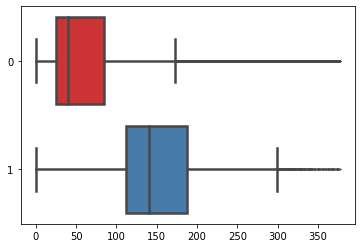

In [10]:
fig, ax = plt.subplots()
sns.boxplot(x='TS', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TS'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

In [11]:
temp_df = remove_outlier(df, 'RC_RECENCY')
temp_df[temp_df['RC_FLAG'] == 1].describe()

TS    RC_RECENCY        TPV_6M  COVER_DAY_6M    RC_FLAG
count  1.748480e+06  1.748480e+06  1.748480e+06  1.748480e+06  1748480.0
mean   1.519580e+02  1.921064e+00  8.206295e+02  1.391096e+02        1.0
std    8.438506e+01  5.317501e+00  6.870589e+02  6.218784e+01        0.0
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00        1.0
25%    1.121500e+02  1.000000e+00  4.205700e+02  9.000000e+01        1.0
50%    1.401900e+02  1.000000e+00  8.411400e+02  1.550000e+02        1.0
75%    1.869200e+02  1.000000e+00  1.121520e+03  1.800000e+02        1.0
max    3.600000e+03  4.000000e+01  6.128170e+04  1.174600e+04        1.0

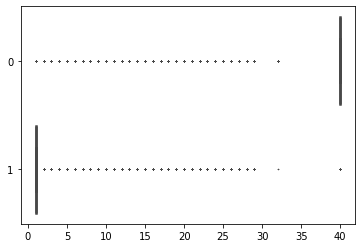

In [12]:
fig, ax = plt.subplots()
sns.boxplot(x='RC_RECENCY', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'RC_RECENCY'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

In [13]:
temp_df = remove_outlier(df, 'TPV_6M')
temp_df[temp_df['RC_FLAG'] == 0].describe()

TS    RC_RECENCY        TPV_6M  COVER_DAY_6M    RC_FLAG
count  1.440349e+06  1.440349e+06  1.440349e+06  1.440349e+06  1440349.0
mean   7.761701e+01  3.259064e+01  9.973231e+02  7.366370e+01        0.0
std    1.132878e+02  1.361542e+01  8.256418e+02  6.497042e+01        0.0
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00        0.0
25%    2.490661e+01  4.000000e+01  2.620000e+02  2.000000e+01        0.0
50%    3.866647e+01  4.000000e+01  7.728400e+02  5.400000e+01        0.0
75%    8.500000e+01  4.000000e+01  1.658000e+03  1.190000e+02        0.0
max    2.600000e+03  4.000000e+01  2.811080e+03  1.380000e+03        0.0

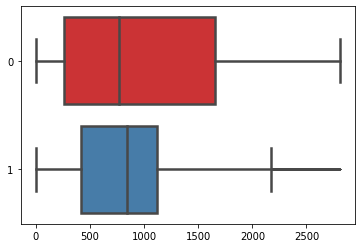

In [14]:
fig, ax = plt.subplots()
sns.boxplot(x='TPV_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TPV_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

In [15]:
temp_df = remove_outlier(df, 'COVER_DAY_6M')
temp_df[temp_df['RC_FLAG'] == 1].describe()

TS    RC_RECENCY        TPV_6M  COVER_DAY_6M    RC_FLAG
count  1.746230e+06  1.746230e+06  1.746230e+06  1.746230e+06  1746230.0
mean   1.518063e+02  1.919930e+00  8.141745e+02  1.386647e+02        1.0
std    8.326550e+01  5.313918e+00  6.319866e+02  6.013635e+01        0.0
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00        1.0
25%    1.121500e+02  1.000000e+00  4.205700e+02  9.000000e+01        1.0
50%    1.401900e+02  1.000000e+00  8.411400e+02  1.540000e+02        1.0
75%    1.869200e+02  1.000000e+00  1.121520e+03  1.800000e+02        1.0
max    3.600000e+03  4.000000e+01  3.364482e+04  3.750000e+02        1.0

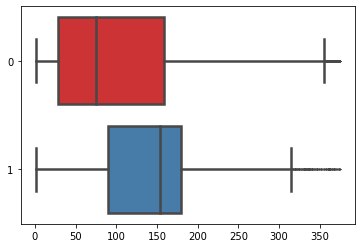

In [16]:
fig, ax = plt.subplots()
sns.boxplot(x='COVER_DAY_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'COVER_DAY_6M'), palette='Set1', orient='h',fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

# Xgboost Model

In [17]:
model = xgb.XGBClassifier(importance_type='gain')
model.fit(X_train, y_train)

/opt/conda/envs/python36_prod/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/envs/python36_prod/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[07:41:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
pred_prob = model.predict_proba(X_test)

In [19]:
acc = accuracy_score(y_test, predictions)
f1_acc = f1_score(y_test, predictions)

In [20]:
print('ACCURACY :', acc)
print('F1 SCORE :', f1_acc)

ACCURACY : 0.9603069523243045
F1 SCORE : 0.9603313980820865


In [55]:
precision_recall_fscore_support(y_test,predictions)

(array([0.95981421, 0.96079956]),
 array([0.9607512 , 0.95986369]),
 array([0.96028248, 0.9603314 ]),
 array([349310, 350082]))

In [21]:
importances = list(zip(model.feature_importances_, X_train))
importances.sort(reverse=True)
for item in importances:
    print(item[1], item[0])

RC_RECENCY 0.98024553
TPV_6M 0.009092076
TS 0.007117398
COVER_DAY_6M 0.0035448312


# Confusion Matrix

In [22]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

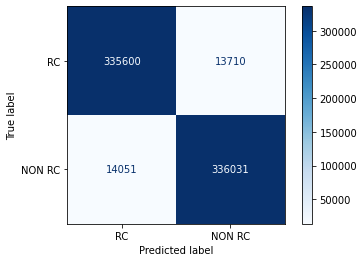

In [23]:
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=['RC', 'NON RC'],
                             cmap=plt.cm.Blues,)

In [24]:
confusion_matrix(y_test, y_pred)

array([[335600,  13710],
       [ 14051, 336031]])

In [25]:
disp.confusion_matrix

array([[335600,  13710],
       [ 14051, 336031]])

# ROC AUC

In [26]:
from sklearn.metrics import plot_roc_curve

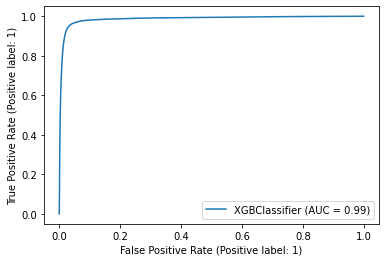

In [27]:
plot_roc_curve(model, X_test, y_test) 

# Lift Chart

In [28]:
import scikitplot as skplt

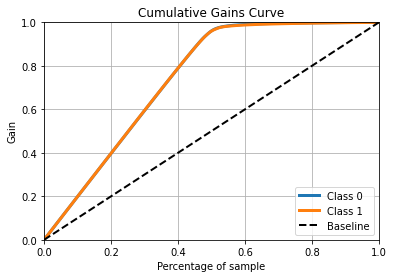

In [29]:
skplt.metrics.plot_cumulative_gain(y_test, pred_prob)
plt.show()

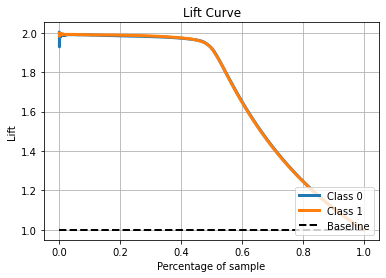

In [30]:
skplt.metrics.plot_lift_curve(y_test, pred_prob)
plt.show()

# Save model

In [31]:
model.save_model('new_vas_rc_xgb.json')

# Evaluate

In [32]:
X_eval, y_eval = load_data('jan_tmn_test.csv')

In [33]:
X_eval.shape

(3814291, 4)

In [34]:
y_eval['RC_FLAG'].value_counts()

0    3611267
1     203024
Name: RC_FLAG, dtype: int64

In [35]:
X_eval.shape

(3814291, 4)

In [36]:
bst = xgb.Booster({'nthread': 4})
bst.load_model('new_vas_rc_xgb.json')

In [37]:
pred = model.predict(X_eval)
predictions_eval = np.array([round(value) for value in pred])

In [38]:
acc = accuracy_score(y_eval, predictions_eval)
f1_acc = f1_score(y_eval, predictions_eval)

In [39]:
print('ACCURACY :', acc)
print('F1 SCORE :', f1_acc)

ACCURACY : 0.8891563333788639
F1 SCORE : 0.32097199023512785


In [40]:
print(np.count_nonzero(predictions_eval == 0))
print(np.count_nonzero(predictions_eval == 1))

3394675
419616


In [41]:
confusion_matrix(y_eval, predictions_eval)

array([[3291576,  319691],
       [ 103099,   99925]])

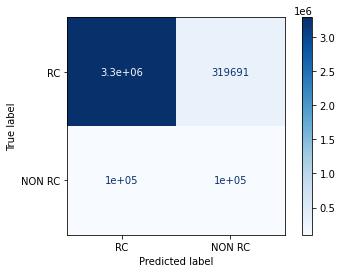

In [42]:
disp = plot_confusion_matrix(model, X_eval, y_eval,
                             display_labels=['RC', 'NON RC'],
                             cmap=plt.cm.Blues,)

In [43]:
disp.confusion_matrix

array([[3291576,  319691],
       [ 103099,   99925]])

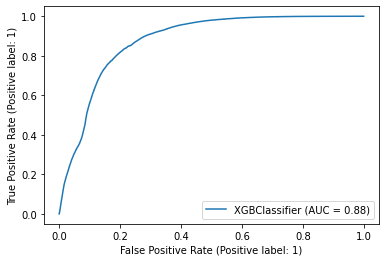

In [44]:
plot_roc_curve(model, X_eval, y_eval) 

# Prob predict

In [45]:
prob_result = model.predict_proba(X_eval)
df_eval = pd.concat([X_eval, y_eval],axis=1)
df_eval['PROB'] = prob_result[:,1:]

In [46]:
df_eval.head()

TS  RC_RECENCY   TPV_6M  COVER_DAY_6M  RC_FLAG      PROB
1604041   35.124541          40  2666.72           122        0  0.008146
1847508   88.548333          40   561.05            73        0  0.030277
1506649   49.211825          40  2175.60           125        0  0.007800
1549144  242.700000          40  1607.00           131        0  0.030811
474758    77.327500           5   477.50            93        1  0.226386

In [47]:
df_eval.to_csv(os.path.join(DATA_PATH, 'rc_result.csv'))

# Feb Prediction

In [48]:
feb_df = pd.read_csv(os.path.join(DATA_PATH, 'feb_tmn_test.csv'))

In [49]:
data_df = feb_df[[
        'TS',
        'RC_RECENCY',
        'TPV_6M',
        'COVER_DAY_6M',
]]

In [50]:
bst = xgb.Booster({'nthread': 4})
bst.load_model('new_vas_rc_xgb.json')

In [51]:
prob_result = model.predict_proba(data_df)

In [52]:
feb_df['PROB'] = prob_result[:,1:]

In [53]:
feb_df.to_csv(os.path.join(DATA_PATH, 'rc_feb_result.csv'),index=False)